In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X = df.drop("target", axis=1)
y = df['target']


X_vis = X[['mean radius', 'mean texture']].values
y_vis = y.values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_vis_scaled = scaler.fit_transform(X_vis)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# New Section

# New Section

In [4]:
# Linear SVM
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

# RBF SVM
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)

print("Linear SVM accuracy:", svm_linear.score(X_test, y_test))
print("RBF SVM accuracy:", svm_rbf.score(X_test, y_test))


Linear SVM accuracy: 0.956140350877193
RBF SVM accuracy: 0.9736842105263158


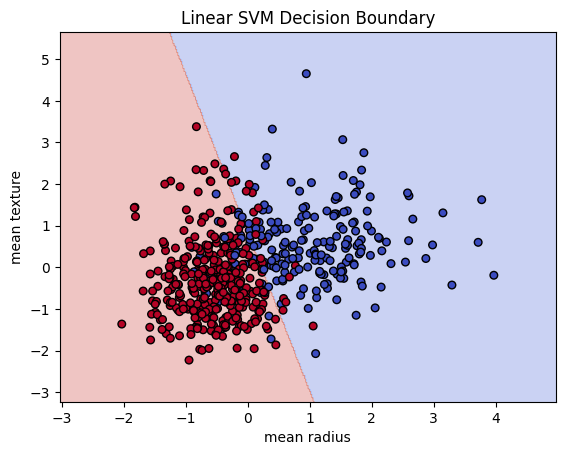

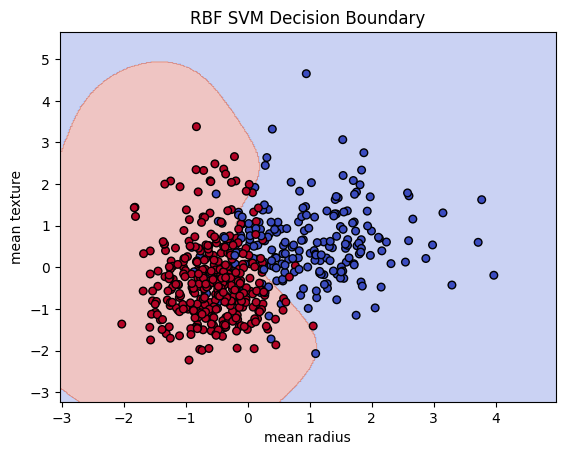

In [5]:
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel("mean radius")
    plt.ylabel("mean texture")
    plt.show()

# Train models on 2D features
svm_lin_2d = SVC(kernel='linear', C=1).fit(X_vis_scaled, y_vis)
svm_rbf_2d = SVC(kernel='rbf', C=1, gamma=0.5).fit(X_vis_scaled, y_vis)

plot_decision_boundary(svm_lin_2d, X_vis_scaled, y_vis, "Linear SVM Decision Boundary")
plot_decision_boundary(svm_rbf_2d, X_vis_scaled, y_vis, "RBF SVM Decision Boundary")


In [6]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_scaled, y)

print("Best parameters:", grid.best_params_)
print("Best cross-val score:", grid.best_score_)


Best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-val score: 0.9789318428815401


In [7]:
# Cross-validation with Linear & RBF
scores_linear = cross_val_score(SVC(kernel='linear', C=1), X_scaled, y, cv=5)
scores_rbf = cross_val_score(SVC(kernel='rbf', C=1, gamma='scale'), X_scaled, y, cv=5)

print("Linear SVM CV accuracy:", scores_linear.mean())
print("RBF SVM CV accuracy:", scores_rbf.mean())


Linear SVM CV accuracy: 0.9701443875174661
RBF SVM CV accuracy: 0.9736376339077782
